# Are Fandango Movie Ratings Reliable?

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator).

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:
<ul>
    <li>The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.</li>
    <li>In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.</li>
    <li>For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.</li>
</ul>
Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

# Summary of Results

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.

# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange

# Reading the data

Dataset previous Hickey's analysis:

In [2]:
fandango_score_comparison = pd.read_csv("fandango_score_comparison.csv")
fandango_score_comparison.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
fandango_score_comparison.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,...,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


In [4]:
fandango_score_info = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']

In [5]:
fandango_previous = fandango_score_comparison[fandango_score_info].copy()
fandango_previous

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
...,...,...,...,...,...
141,Mr. Holmes (2015),4.0,4.0,1348,0.0
142,'71 (2015),3.5,3.5,192,0.0
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0


Datasey after Hickey's analysis:

In [6]:
movie_rating = pd.read_csv("movie_ratings_16_17.csv")
movie_rating.head(5)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [7]:
movie_rating.describe()

,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2016.107477,53.266355,6.440654,53.621495,58.626168,3.894860,2.663318,3.220327,2.681075,2.931308,2.658879,3.214953,2.691589,2.915888
std,0.310444,17.843585,1.030056,30.242396,21.100040,0.516781,0.892179,0.515028,1.512120,1.055002,0.924619,0.526803,1.519273,1.060352
min,2016.000000,11.000000,3.500000,0.000000,11.000000,2.500000,0.550000,1.750000,0.000000,0.550000,0.500000,2.000000,0.000000,0.500000
25%,2016.000000,39.000000,5.825000,27.000000,43.250000,3.500000,1.950000,2.912500,1.350000,2.162500,2.000000,3.000000,1.500000,2.000000
50%,2016.000000,53.500000,6.500000,56.500000,60.500000,4.000000,2.675000,3.250000,2.825000,3.025000,2.500000,3.000000,3.000000,3.000000
75%,2016.000000,66.000000,7.200000,83.000000,76.750000,4.500000,3.300000,3.600000,4.150000,3.837500,3.500000,3.500000,4.000000,4.000000
max,2017.000000,99.000000,8.500000,99.000000,93.000000,5.000000,4.950000,4.250000,4.950000,4.650000,5.000000,4.000000,5.000000,4.500000


In [8]:
movie_rating_info = ['movie', 'year', 'fandango']

In [9]:
fandango_after = movie_rating[movie_rating_info].copy()
fandango_after

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
...,...,...,...
209,X-Men: Apocalypse,2016,4.0
210,XX,2017,3.0
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5


# Defining the population

We found that different sampling criteria was used for each dataset.
The dataset **fandango_score_comparison** contains the movies that until **Aug. 24th, 2015** have had:
<ul>
    <li>At least <b>30</b> fan reviews on Fandango.</li>
    <li>Tickets on sale on 2015.</li>
    <li>Ratings on: Rotten Tomatoes and RT User. </li>
    <li>Scores on: Metractiritc, Metacritic User and IMDb.</li>
</ul>

The **movie_rating** analyzed dataset contains movies that:

<ul>
    <li>Most popular movies with significant number of votes (without specifing it).</li>
    <li>Released in 2016 and 2017.</li>
</ul>

After viewing the sampling criteria, we understand that the sampling process in both cases was more selective rather than random, this means that not all the movies had the same chances to be included in both samples. Hence, the resulting samples are very unlikely to be representative of the entire population of interest.

At this point, we can decide or to collect new data, or to tweak the goal of our analysis so that to change the population of interest and make the available samples representative. The second approach looks much faster and, in general, more realistic, so let's hold to it.

# Analysis Goal

Our initial goal, as stated in the introduction, was to analyze more recent movie ratings data and determine whether there has been any change in Fandango's rating system after Hickey's analysis. Introducing changes to this statement, we have to keep in mind that the modified goal has still to be its fairly good proxy.

We see that in both samples the selected movies are somehow the popular ones (even though the quantitive definition of popularity for them differs), and have ratings from the same review sources, including Rotten Tomatoes, Metacritic, IMDB, and Fandango (for now, we'll be interested only in Fandango's ratings). The dataset before the analysis (the fandango_score_comparison dataframe) is related to **2015**, while the one after the analysis (movie_rating) – to **2016 and 2017**.

We can decide to exclude the data for **2017** from the second dataset and **compare only the year before the analysis (2015) and the year after (2016)**.

In this way, our new project goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. With this new goal we have two populations of interest:
<ul>
    <li><b>All Fandango's ratings for popular movies released in 2015.</b></li>
    <li><b>All Fandango's ratings for popular movies released in 2016.</b> </li>
</ul>

The term ***popular*** is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as ***popular*** only if it has 30 fan ratings or more on Fandango's website.   

# Samples isolation

Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.   

In [10]:
fandango_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we used a value of 1 as the random seed. This is good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample.

The documentation states clearly that there're only movies with at least 30 fan ratings. Let's double check that ther is no data intrusion in the **fandango_previous** dataset.

In [11]:
fandango_previous[fandango_previous['Fandango_votes'] < 30].sum()

FILM                    0.0
Fandango_Stars          0.0
Fandango_Ratingvalue    0.0
Fandango_votes          0.0
Fandango_Difference     0.0
dtype: float64

## Feature engineering

In [12]:
fandango_previous

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
...,...,...,...,...,...
141,Mr. Holmes (2015),4.0,4.0,1348,0.0
142,'71 (2015),3.5,3.5,192,0.0
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0


As we can see in the previous table, there are **Films** that weren't released during 2015 or 2016. To achieve our analysis goal, we will need to isolate and work only with the films released in 2015 or 2016.

In [13]:
fandango_previous["Year"] = fandango_previous["FILM"].str[-5:-1].astype(int)

In [14]:
fandango_previous

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
...,...,...,...,...,...,...
141,Mr. Holmes (2015),4.0,4.0,1348,0.0,2015
142,'71 (2015),3.5,3.5,192,0.0,2015
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0,2014
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0,2015


In [15]:
fandango_previous['Year'].value_counts(dropna=False)

2015    129
2014     17
Name: Year, dtype: int64

Fortunately, there aren't null values for the **Year** column. But, there are 17 films released during **2014** which we must ignore.

In [16]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == 2015].copy()
fandango_2015

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
...,...,...,...,...,...,...
140,Inside Out (2015),4.5,4.5,15749,0.0,2015
141,Mr. Holmes (2015),4.0,4.0,1348,0.0,2015
142,'71 (2015),3.5,3.5,192,0.0,2015
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0,2015


Now, let's check the **fandango_after** dataset.

In [17]:
fandango_after

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
...,...,...,...
209,X-Men: Apocalypse,2016,4.0
210,XX,2017,3.0
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5


In [18]:
fandango_after['year'].value_counts(dropna=False)

2016    191
2017     23
Name: year, dtype: int64

In the **fandango_after** dataset, there are 23 films released during **2017** which we must ignore.

In [19]:
fandango_2016 = fandango_after[fandango_after['year'] != 2017].copy()
fandango_2016

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
...,...,...,...
207,Whiskey Tango Foxtrot,2016,3.5
208,Why Him?,2016,4.0
209,X-Men: Apocalypse,2016,4.0
212,Zoolander 2,2016,2.5


# Comparing distributions 2015 & 2016

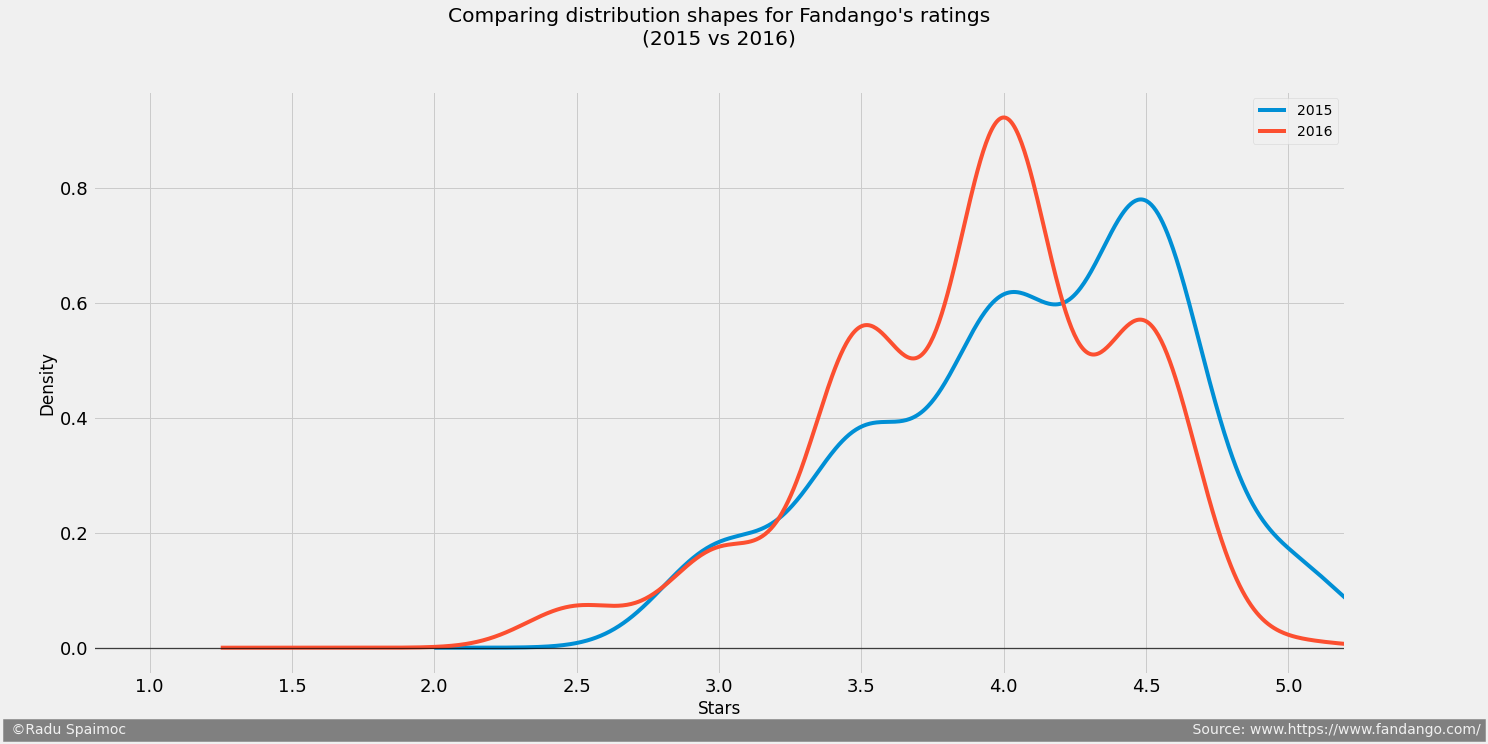

In [61]:
plt.style.use('fivethirtyeight')

# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]


fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (20,10), color=colors)
fandango_2016['fandango'].plot.kde(label = '2016', legend = True, color=colors)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) 
plt.xlabel('Stars')
plt.xlim(0,5) 
plt.xticks(arange(0,5.1,.5))
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

# Generate a bolded horizontal line at y = 0
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

# Add an extra vertical line by tweaking the range of the x-axis
plt.xlim(0.8, 5.2)

# The signature bar
plt.text(x = 0.5, y = -0.15,
    s = ' ©Radu Spaimoc                                                                                                                                                                                                                                             Source: www.https://www.fandango.com/',
               fontsize = 14,
               color = '#f0f0f0',
               backgroundcolor = 'grey')


plt.show()

On the previous figure we can observe that:
<ul>
    <li>Both distributions are strongly <b>left skewed</b>.</li>
    <li>The 2016 distribution is slightly shifted to the left in comparison with </li>
</ul>

As we can see during 2015, on Fandango are given mostly high and very high fan ratings. The slight left shift of the 2016 distribution is very interesting. It shows that ratings were lower on 2016 than 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.
The previous kernel density plots also show us the direction of the difference between 2015 and 2016, moveis in 2016 were slightly lower.

# Frequency distribuition comparison

Let's examine the frequency tables of the two distributions to analyze some numbers. Because the data sets have different numbers of movies, we normalize the tables and show percentages instead of showing absolute frequencies.

## 2015

In [21]:
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

## 2016

In [22]:
fandango_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016 very high ratings had significantly lower percentages than in 2015. Under **1%** of the movies had a perfect rating, instead in 2015 there were near **7**. Ratings with **4.5** were also consiferably higher **38**, during 2016 only **25%**.

There clearly is a difference between the two frequency distributions. The minimum rating durinng 2016 is also lower, but there was a greater percentage of movies that received 3.5 or 4 stars, compared to **2015**. These are high ratings and this challanges the direction of the change we saw on the kernel density plots. In the next section we will analyze deeply the direction of the change.

# Analyzing the Direction of the Change

In this section we'll take a couple of summary statistics to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [23]:
mean_b = fandango_2015['Fandango_Stars'].mean()
median_b = fandango_2015['Fandango_Stars'].median()
mode_b = fandango_2015['Fandango_Stars'].mode()[0]

mean_a = fandango_2016['fandango'].mean()
median_a = fandango_2016['fandango'].median()
mode_a = fandango_2016['fandango'].mode()[0]

stats = pd.DataFrame()
stats['2015'] = [mean_b, median_b, mode_b]
stats['2016'] = [mean_a, median_a, mode_a]
stats.index = ['mean', 'median', 'mode']

In [24]:
stats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


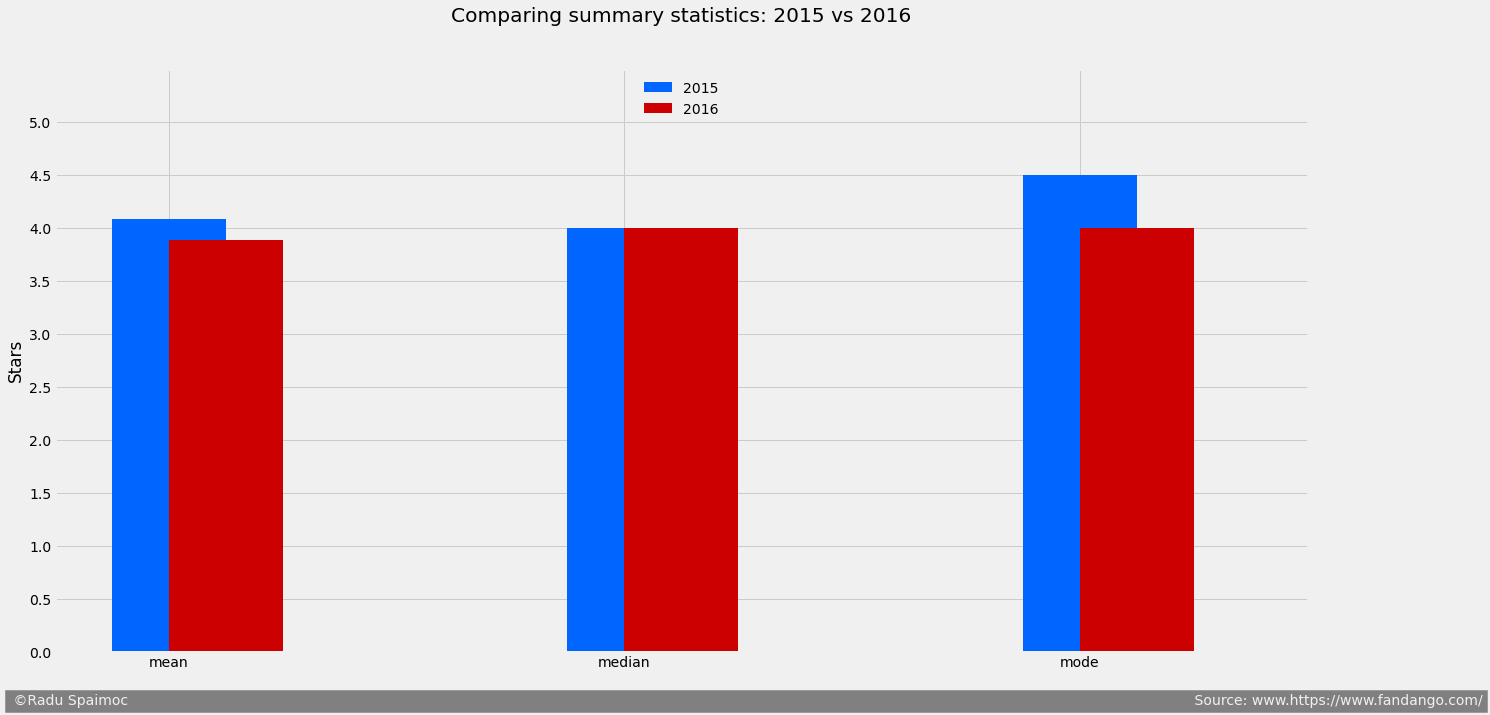

In [68]:
plt.style.use('fivethirtyeight')
stats['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25, figsize=(20, 10))
stats['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0)

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
# The signature bar
plt.text(x = -0.35, y = -0.5,
    s = ' ©Radu Spaimoc                                                                                                                                                                                                                                             Source: www.https://www.fandango.com/',
               fontsize = 14,
               color = '#f0f0f0',
               backgroundcolor = 'grey')

plt.show()

The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

In [26]:
round((stats.loc['mean'][0] - stats.loc['mean'][1]) / stats.loc['mean'][0], 2)

0.05

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

# Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.